# <font color=red>other</font>

In [2]:
! pip install missingno


# Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

######################################

from sklearn.datasets import load_iris
from sklearn import preprocessing

######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [2]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [4]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [5]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Variable Distribution

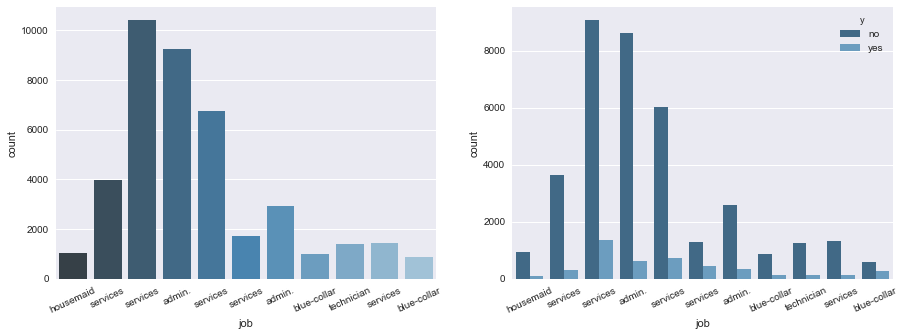

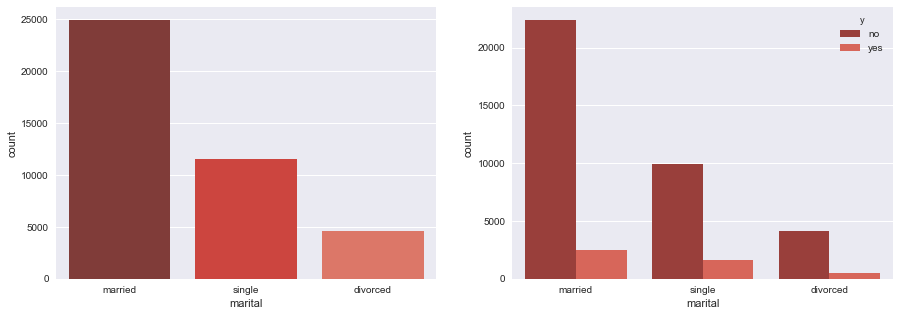

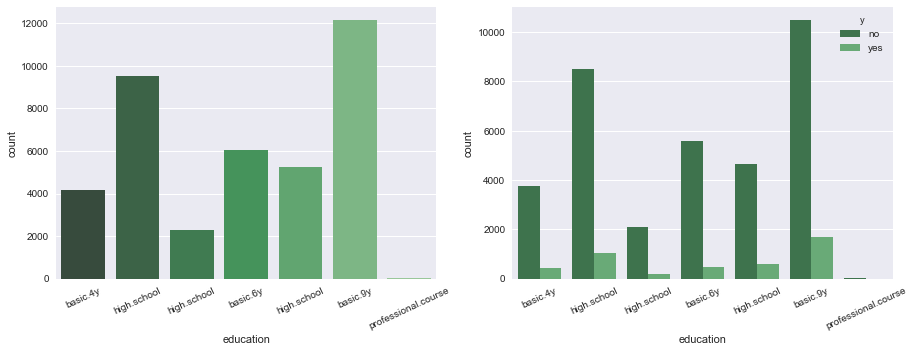

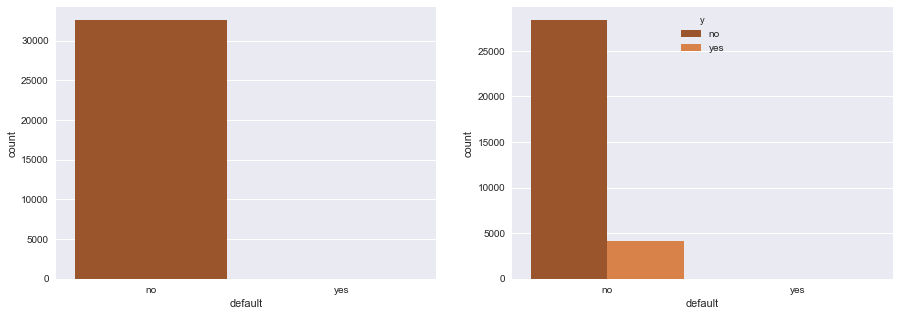

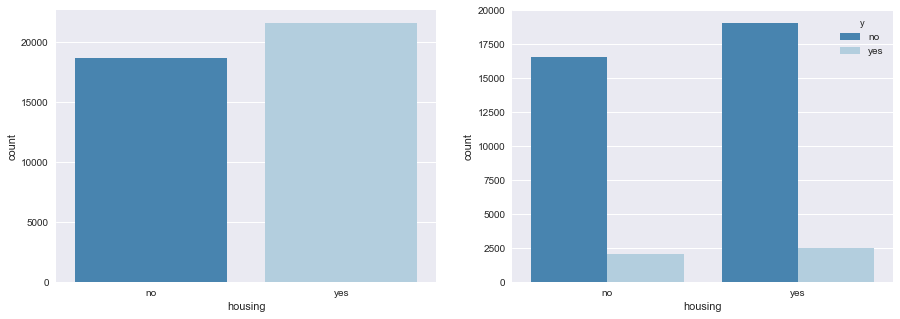

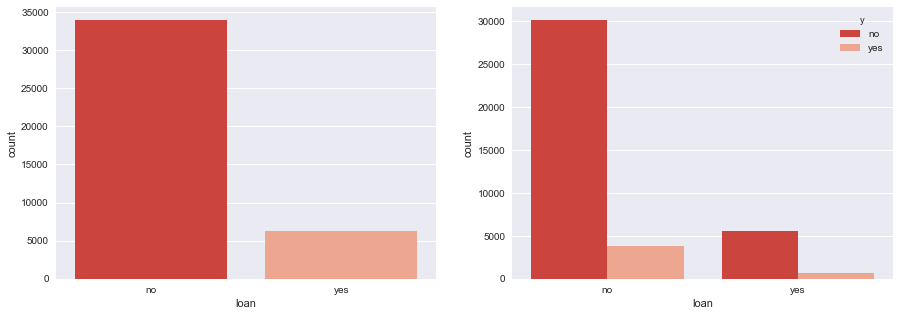

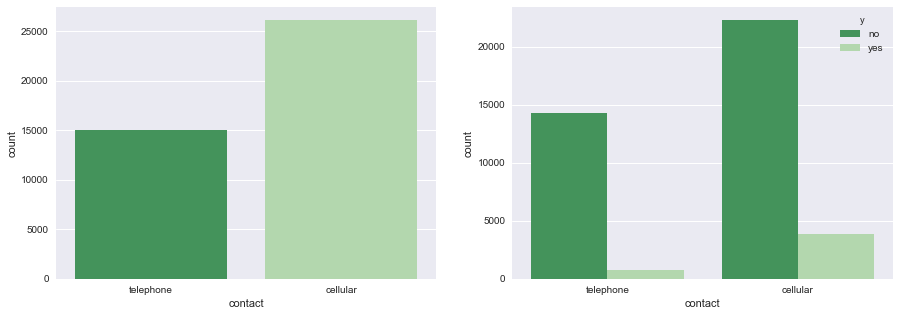

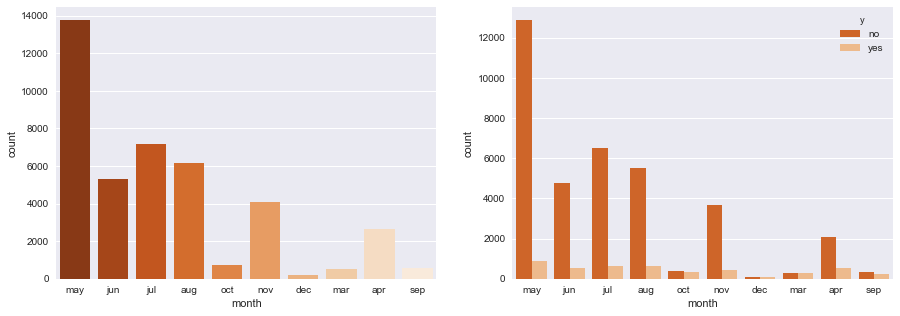

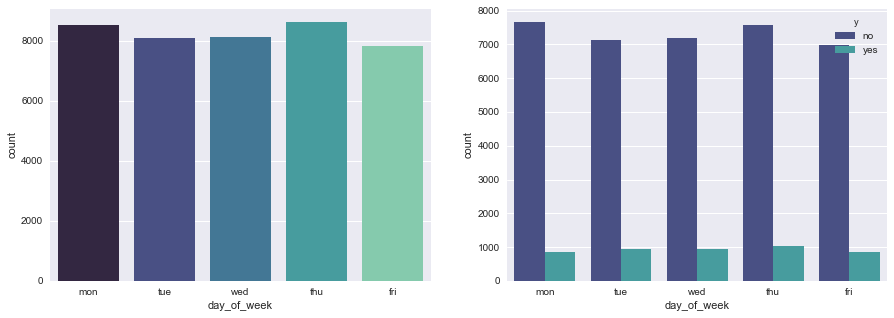

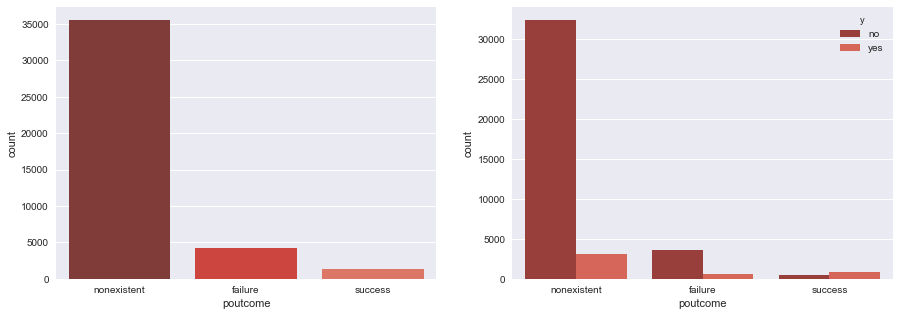

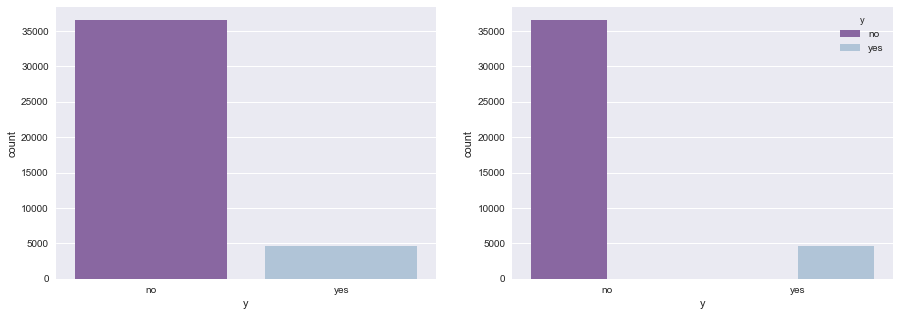

In [6]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column], rotation=25)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column], rotation=25)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [7]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

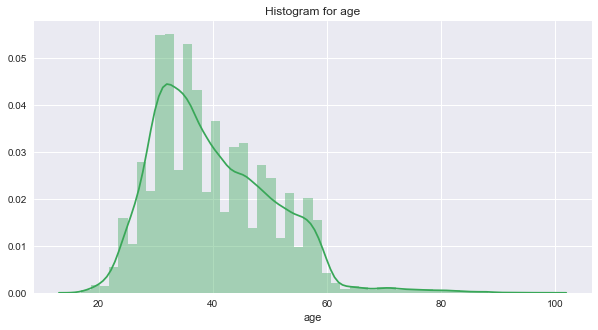

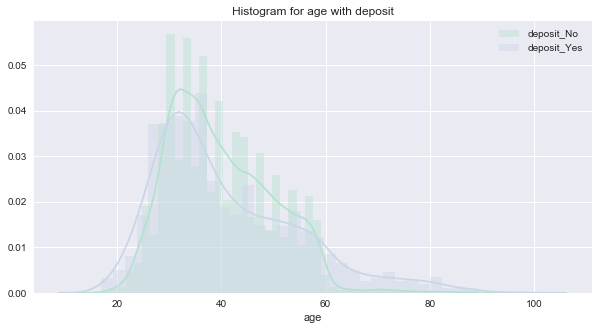

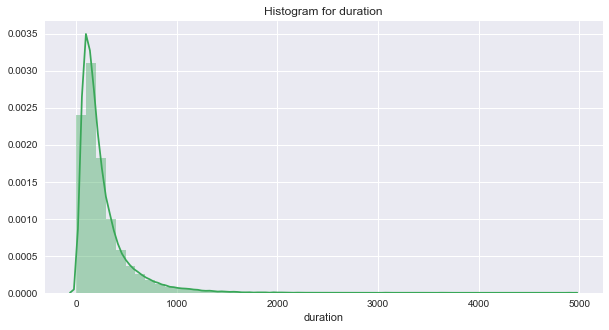

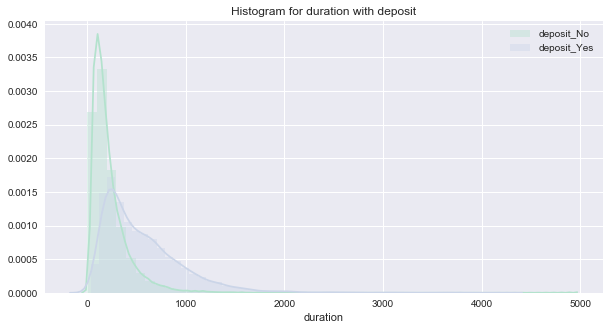

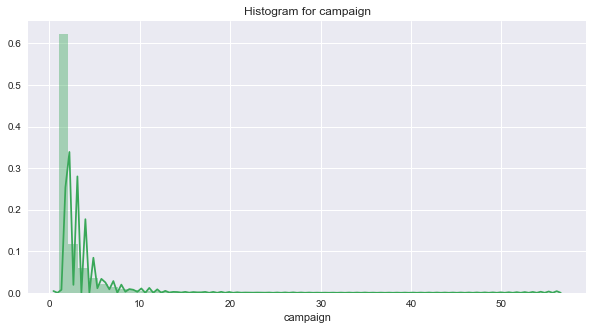

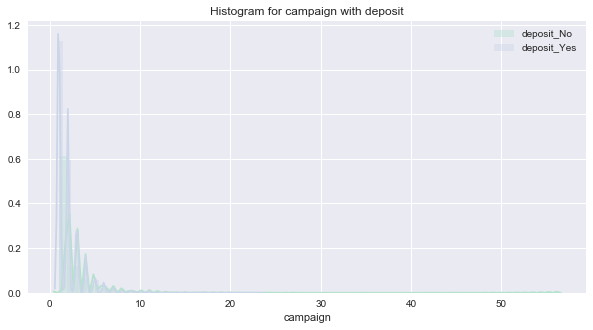

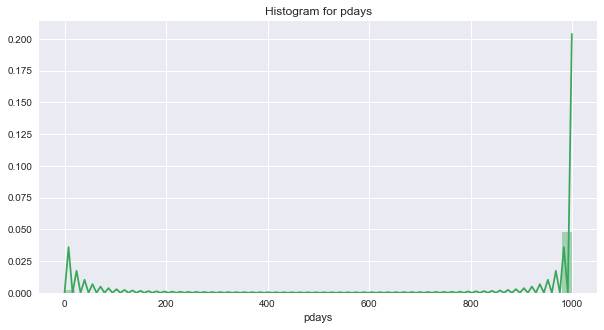

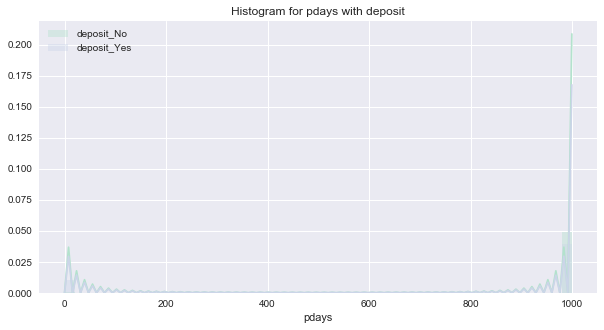

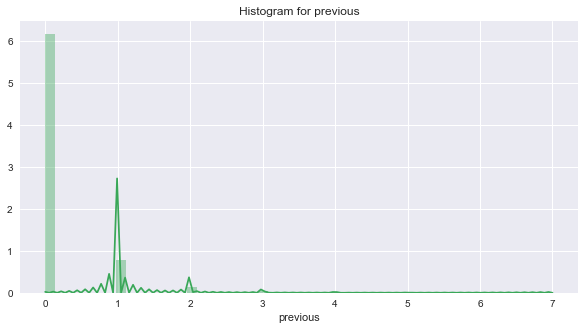

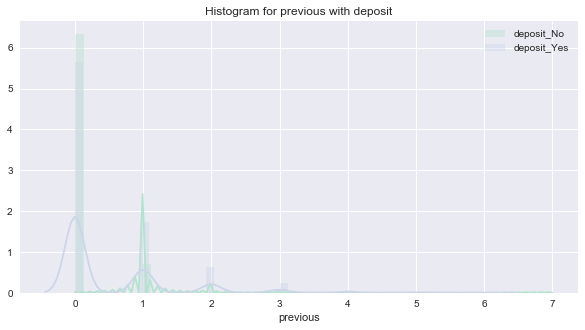

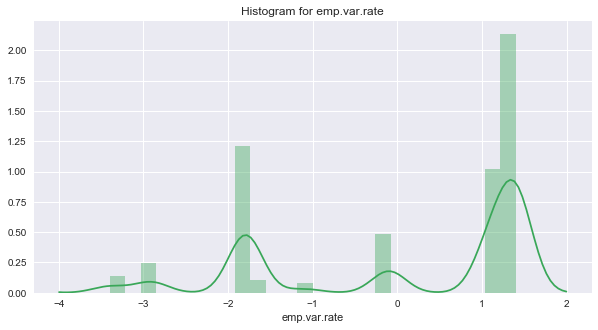

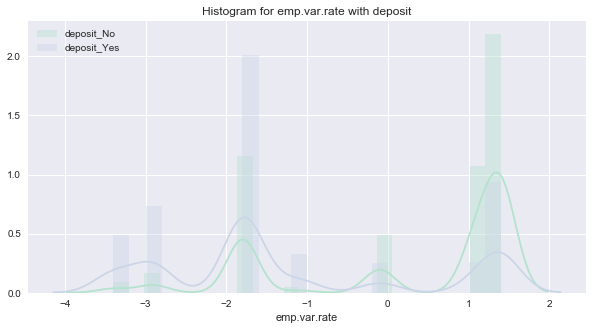

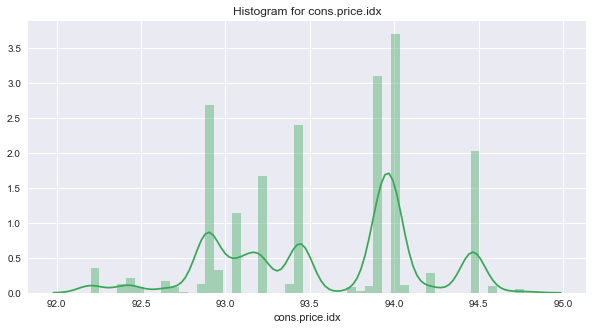

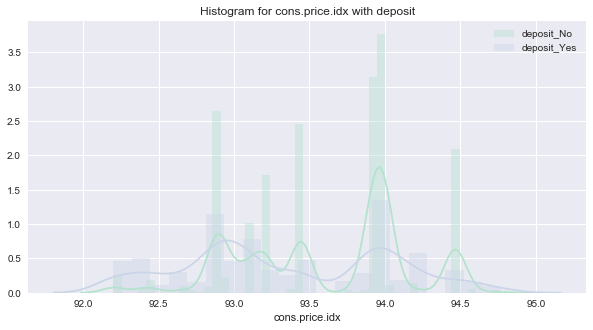

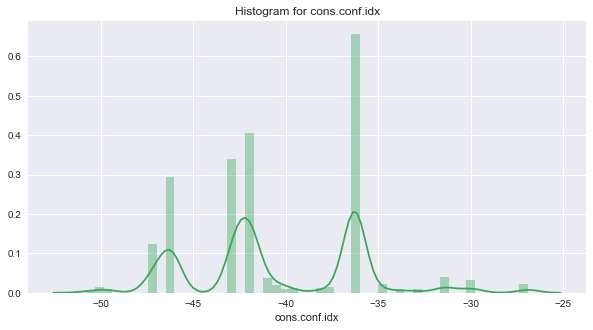

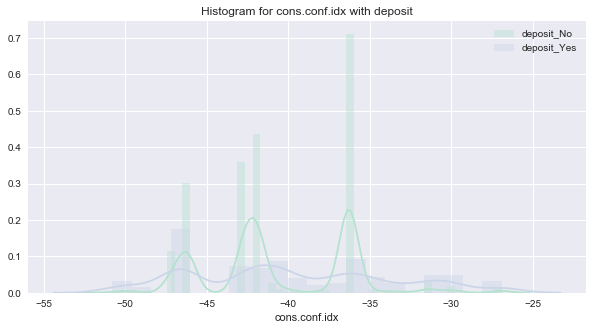

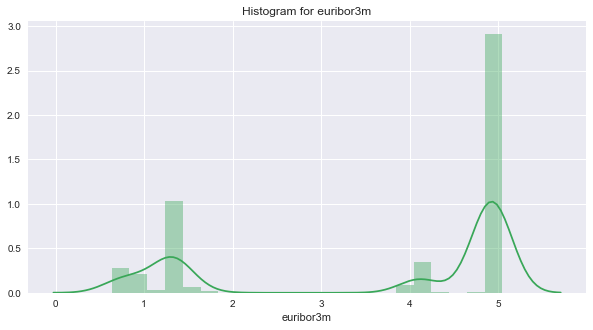

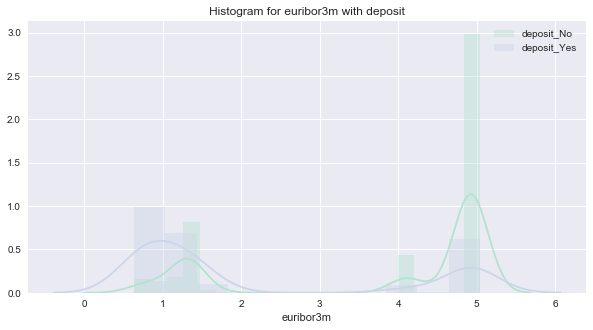

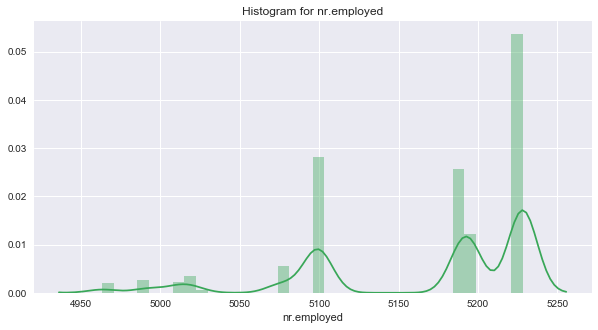

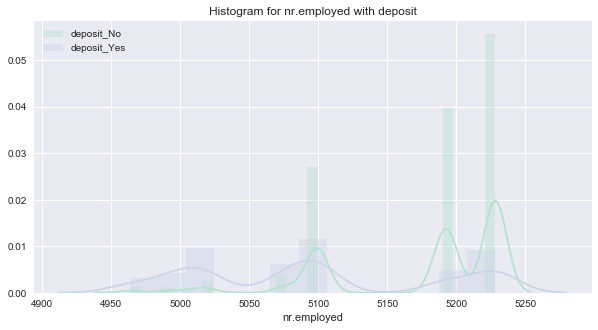

In [8]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Feature Info

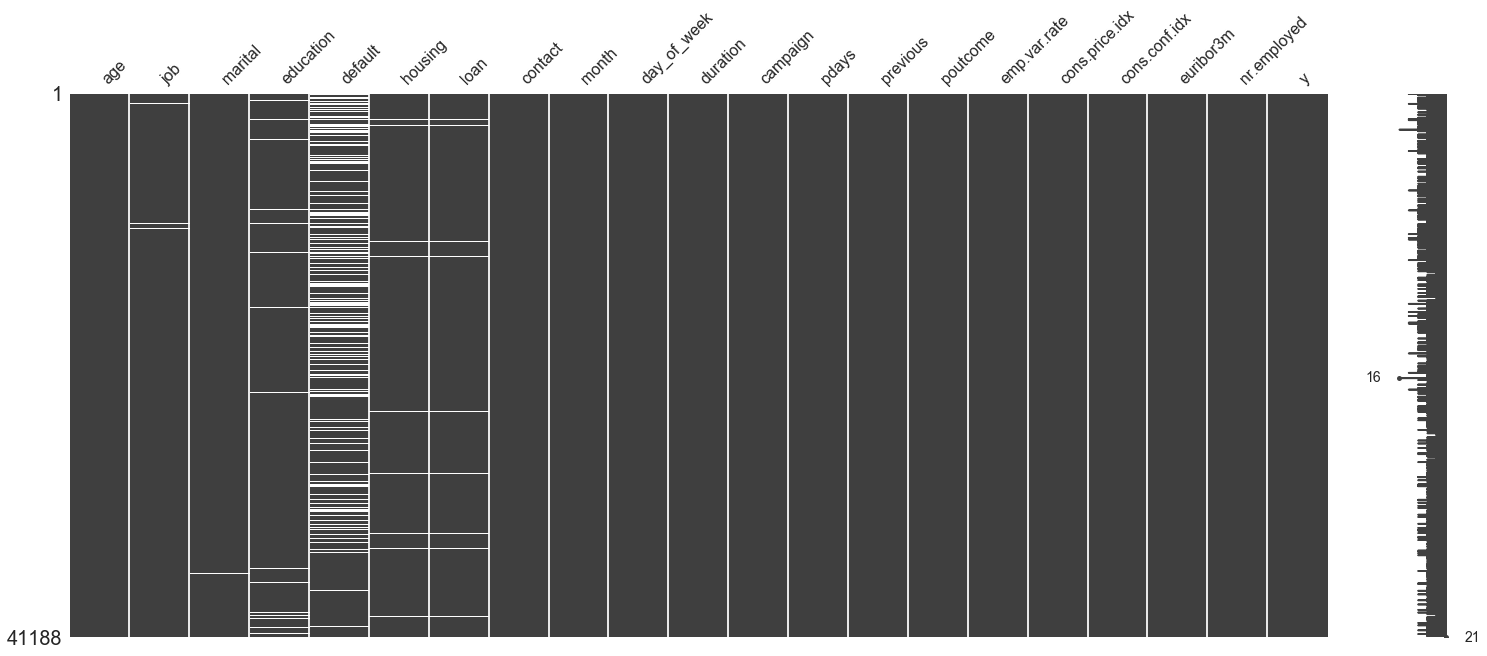

In [9]:
#visualizing missing data

msno.matrix(dsdata) 

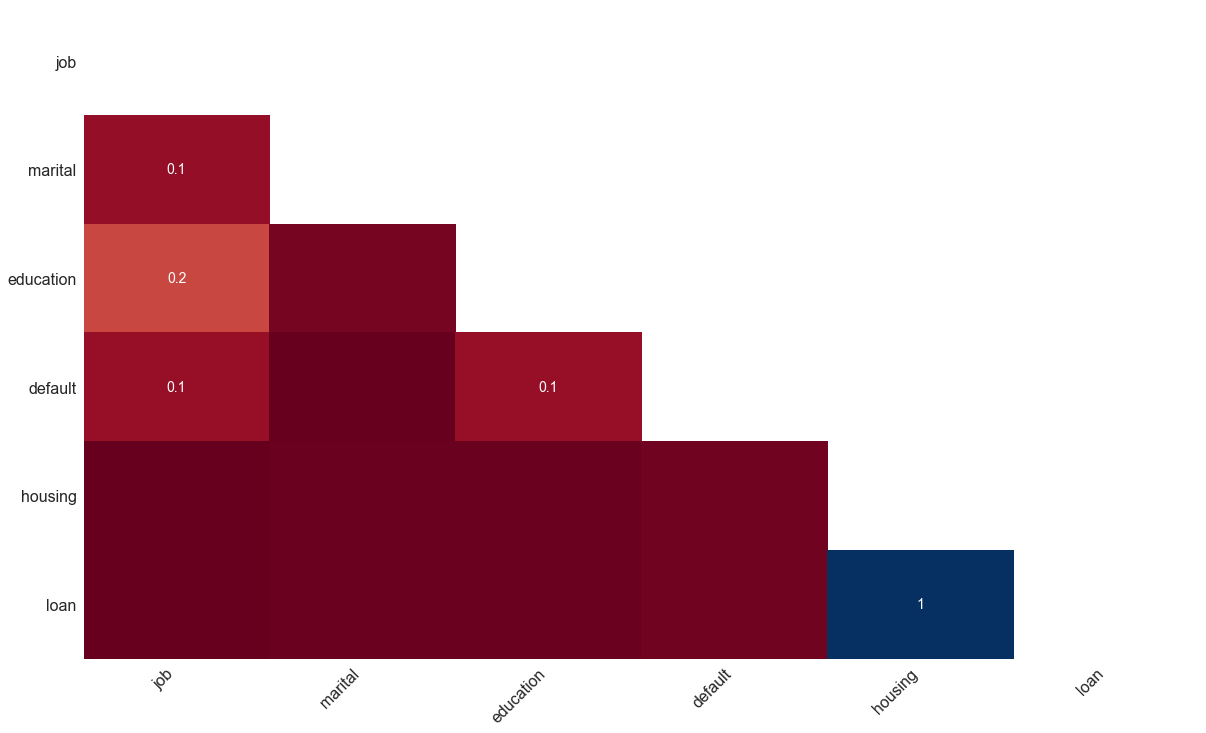

In [10]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another

msno.heatmap(dsdata)

# Feature Engineering

In [11]:
# Data preparation
dsn = dsdata.copy()

# Drop missing value
dsn2 = dsn.copy().dropna()

In [12]:
# Create dummy

numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
nonnumvar = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for c,var in enumerate(nonnumvar):  
    dummy = pd.get_dummies(dsn2[var],drop_first=True)
    dsn2 = dsn2.drop(columns=[var])
    dsn2 = pd.concat([dsn2, dummy], axis=1)

dsn2.info()
dsn2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 48 columns):
age                    30488 non-null int64
duration               30488 non-null int64
campaign               30488 non-null int64
pdays                  30488 non-null int64
previous               30488 non-null int64
emp.var.rate           30488 non-null float64
cons.price.idx         30488 non-null float64
cons.conf.idx          30488 non-null float64
euribor3m              30488 non-null float64
nr.employed            30488 non-null float64
y                      30488 non-null object
blue-collar            30488 non-null uint8
entrepreneur           30488 non-null uint8
housemaid              30488 non-null uint8
management             30488 non-null uint8
retired                30488 non-null uint8
self-employed          30488 non-null uint8
services               30488 non-null uint8
student                30488 non-null uint8
technician             30488 non-null uint8


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [13]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [14]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

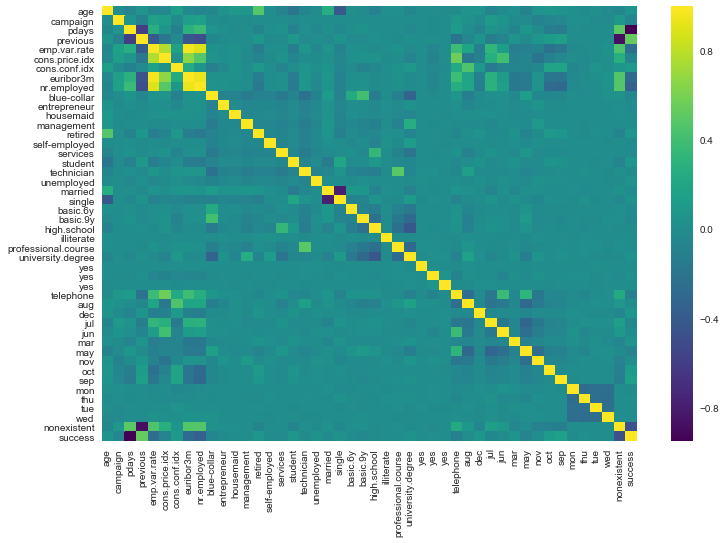

In [15]:
# Check the correlation

plt.figure(figsize=(12,8))
corr = dsn3.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,  cmap='viridis')
plt.show()

## Feature Selection

In [16]:
# drop maried (signle) option- too correlated
dsn4 = dsn3.copy()
dsn4 = dsn4.drop(columns=['single'])

# day_of_week - not relevant
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])

#  poutcome - too correlated
dsn4 = dsn4.drop(columns=['failure','nonexistent','success'])

# macroeconomic - too correlated & May 2008 to November 2010 not significant
dsn4 = dsn4.drop(columns=['emp.var.rate', 'euribor3m', 'nr.employed'])

# pdays  - too correlated
dsn4 = dsn4.drop(columns=['pdays','previous'])


## Outlier Detection

### PCA 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

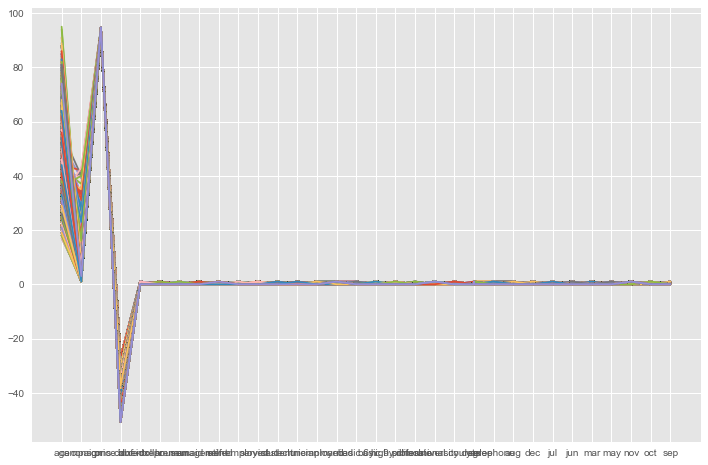

In [18]:
X = dsn4.drop(columns=['y'])

# Plot the data
fig = plt.figure(figsize=(12,8))
with plt.style.context(('ggplot')):
    plt.plot( X.T)
    plt.show()


In [19]:
pcaX = PCA().fit_transform(StandardScaler().fit_transform(X))
# PCA & score 

In [20]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])

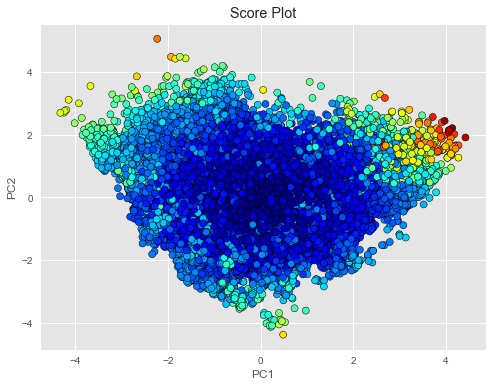

In [21]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()



### Z-score

In [22]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




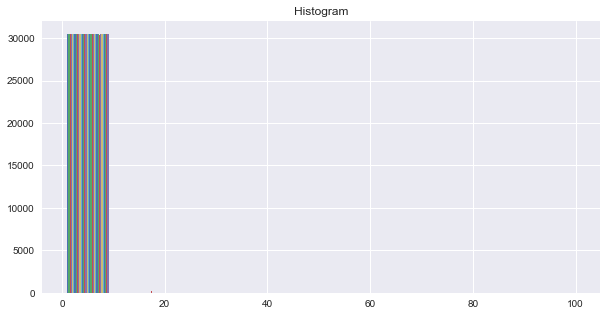

In [23]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [24]:
dsn5 = dsn5[(zX < 10).all(axis=1)]

dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30284 entries, 0 to 41187
Data columns (total 35 columns):
age                    30284 non-null int64
campaign               30284 non-null int64
cons.price.idx         30284 non-null float64
cons.conf.idx          30284 non-null float64
y                      30284 non-null object
blue-collar            30284 non-null uint8
entrepreneur           30284 non-null uint8
housemaid              30284 non-null uint8
management             30284 non-null uint8
retired                30284 non-null uint8
self-employed          30284 non-null uint8
services               30284 non-null uint8
student                30284 non-null uint8
technician             30284 non-null uint8
unemployed             30284 non-null uint8
married                30284 non-null uint8
basic.6y               30284 non-null uint8
basic.9y               30284 non-null uint8
high.school            30284 non-null uint8
illiterate             30284 non-null uint8
profes

In [25]:
X = dsn5.drop(columns=['y'])
Y = pd.get_dummies(dsn5['y'],drop_first=True)

#  Logistic Regression

,age,campaign,cons.price.idx,cons.conf.idx,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep
count,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,...,30284.000000,30284.000000,30284.0,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000,30284.000000
mean,38.989830,2.489532,93.527003,-40.636739,0.186699,0.035794,0.022454,0.076047,0.039097,0.035695,...,0.330108,0.154108,0.0,0.167118,0.118974,0.015916,0.321259,0.115308,0.021199,0.016345
std,10.280662,2.516843,0.583933,4.773190,0.389676,0.185780,0.148157,0.265077,0.193828,0.185533,...,0.470260,0.361058,0.0,0.373087,0.323763,0.125153,0.466968,0.319399,0.144051,0.126802
min,17.000000,1.000000,92.201000,-50.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,93.075000,-42.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,2.000000,93.444000,-41.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,3.000000,93.994000,-36.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,29.000000,94.767000,-26.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,yes
count,30284.000000
mean,0.124884
std,0.330593
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


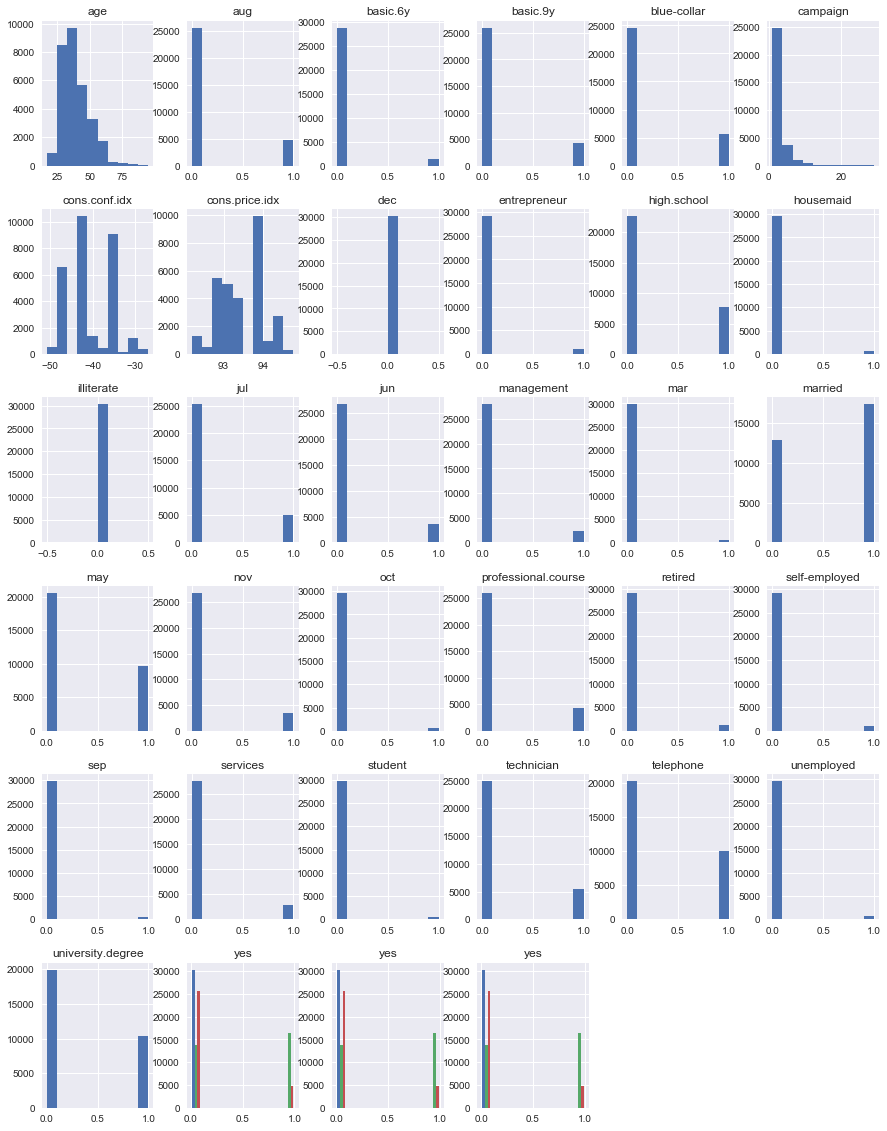

In [26]:
display(X.describe())
display(Y.describe())
X.hist(figsize=(15,20))
plt.show()

In [27]:
X=X.drop(columns = ['dec','illiterate','previous'])
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [28]:
logit = sm.Logit(Y, X).fit(method='CG')
display(logit.summary())

# Cannot converge 

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                30284
Model:                          Logit   Df Residuals:                    30253
Method:                           MLE   Df Model:                           30
Date:                Mon, 06 May 2019   Pseudo R-squ.:                     inf
Time:                        16:30:42   Log-Likelihood:                -20991.
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                          0      0.001          0      1.000      -0.003       0.003
campaign                     0      0.005          0      1.000      -0.009       0.009
cons.price.idx               0      0.002          0      1.000      -0.004       0.004
cons.conf.idx                0      0.003          0      1.000      -0.007       0.007
blue-collar                  0      0.044          0      1.000      -0.086       0.086
entrepreneur                 0      0.065          0      1.000      -0.128       0.128
housemaid                    0      0.083          0      1.000      -0.163       0.163
management                   0      0.048          0      1.000      -0.094       0.094
retired                      0      0.073          0      1.000      -0.142       0.142
self-employed                0      0.065          0      1.000      -0.128       0.128
services                     0      0.046          0      1.000      -0.090       0.090
student                      0      0.088          0      1.000      -0.172       0.172
technician                   0      0.039          0      1.000      -0.077       0.077
unemployed                   0      0.078          0      1.000      -0.153       0.153
married                      0      0.025          0      1.000      -0.049       0.049
basic.6y                     0      0.069          0      1.000      -0.135       0.135
basic.9y                     0      0.053          0      1.000      -0.105       0.105
high.school                  0      0.054          0      1.000      -0.106       0.106
professional.course          0      0.059          0      1.000      -0.116       0.116
university.degree            0      0.055          0      1.000      -0.108       0.108
yes                          0   4.26e+06          0      1.000   -8.35e+06    8.35e+06
yes                          0      0.023          0      1.000      -0.045       0.045
yes                          0      0.032          0      1.000      -0.062       0.062
telephone                    0      0.034          0      1.000      -0.068       0.068
aug                          0      0.065          0      1.000      -0.128       0.128
jul                          0      0.055          0      1.000      -0.107       0.107
jun                          0      0.060          0      1.000      -0.117       0.117
mar                          0      0.102          0      1.000      -0.199       0.199
may                          0      0.051          0      1.000      -0.101       0.101
nov                          0      0.058          0      1.000      -0.114       0.114
oct                          0      0.098          0      1.000      -0.192       0.192
sep                          0      0.108          0      1.000      -0.212       0.212
=======================================================================================
"""

# Classification

In [29]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)

In [31]:
# Try

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for c,var in enumerate(classifiers):
    clf = var
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print(c,var,"Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

0 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') Accuracy: 0.8742570334169859
1 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) Accuracy: 0.8788799366001849
2 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') Accuracy: 0.8306696605468235
3 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impu

### AdaBoost Classifier

Test accuracy: 0.884 , Cross Entropy Loss is: 4.014560080777203
Confusion matrix is:
[[6493  139]
 [ 741  198]]
We have 6691 correct observations and 880 misclassifications.
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      6632
          1       0.59      0.21      0.31       939

avg / total       0.86      0.88      0.86      7571



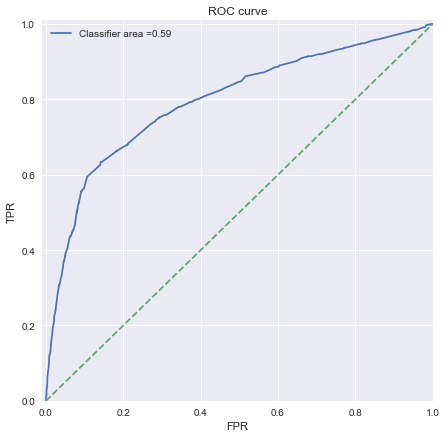

In [32]:
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)

### SVC 

Test accuracy: 0.879 , Cross Entropy Loss is: 4.183343539296983
Confusion matrix is:
[[6587   45]
 [ 872   67]]
We have 6654 correct observations and 917 misclassifications.
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      6632
          1       0.60      0.07      0.13       939

avg / total       0.85      0.88      0.83      7571



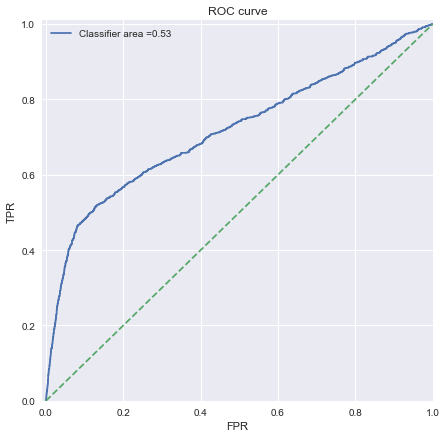

In [33]:
clf_rdfore = SVC(probability=True)
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)



## Linear Regression

Distribution of OLS residuals


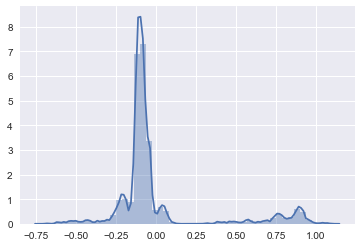

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -13.866
Model:                            OLS   Adj. R-squared:                -13.881
Method:                 Least Squares   F-statistic:                    -910.3
Date:                Mon, 06 May 2019   Prob (F-statistic):               1.00
Time:                        16:39:09   Log-Likelihood:                -7674.5
No. Observations:               30284   AIC:                         1.541e+04
Df Residuals:                   30253   BIC:                         1.567e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.000      1.470      0.141      -0.000       0.001
x2            -0.0049      0.001     -6.791      0.000      -0.006      -0.004
x3             0.0074      0.000     23.441      0.000       0.007       0.008
x4             0.0101      0.001     18.522      0.000       0.009       0.011
x5            -0.0220      0.007     -3.211      0.001      -0.035      -0.009
x6            -0.0254      0.010     -2.490      0.013      -0.045      -0.005
x7            -0.0027      0.013     -0.205      0.837      -0.028       0.023
x8            -0.0148      0.008     -1.973      0.048      -0.030      -0.000
x9             0.0835      0.011      7.375      0.000       0.061       0.106
x10           -0.0169      0.010     -1.665      0.096      -0.037       0.003
x11           -0.0230      0.007     -3.195      0.001      -0.037      -0.009
x12            0.1453      0.014     10.594      0.000       0.118       0.172
x13           -0.0151      0.006     -2.453      0.014      -0.027      -0.003
x14            0.0198      0.012      1.625      0.104      -0.004       0.044
x15           -0.0082      0.004     -2.111      0.035      -0.016      -0.001
x16            0.0055      0.011      0.511      0.610      -0.016       0.027
x17           -0.0035      0.008     -0.419      0.675      -0.020       0.013
x18            0.0060      0.008      0.713      0.476      -0.011       0.023
x19            0.0094      0.009      1.010      0.313      -0.009       0.028
x20            0.0213      0.009      2.475      0.013       0.004       0.038
const       4.602e-17   7.26e-18      6.339      0.000    3.18e-17    6.02e-17
x21            0.0002      0.004      0.053      0.958      -0.007       0.007
x22           -0.0035      0.005     -0.705      0.481      -0.013       0.006
x23           -0.1494      0.005    -27.795      0.000      -0.160      -0.139
x24           -0.2188      0.010    -21.429      0.000      -0.239      -0.199
x25           -0.1404      0.009    -16.508      0.000      -0.157      -0.124
x26           -0.0310      0.009     -3.336      0.001      -0.049      -0.013
x27            0.2486      0.016     15.666      0.000       0.217       0.280
x28           -0.1187      0.008    -14.791      0.000      -0.134      -0.103
x29           -0.1589      0.009    -17.569      0.000      -0.177      -0.141
x30            0.1100      0.015      7.203      0.000       0.080       0.140
x31            0.0960      0.017      5.680      0.000       0.063       0.129
==============================================================================
Omnibus:                    11144.812   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32670.929
Skew:                           1.995   Prob(JB):                         0.00
Ku

Variance Inflation Factors:
23.476407658332807 age
2.0523946872172973 campaign
272.30979818743316 cons.price.idx
154.20714155772353 cons.conf.idx
2.7340898462894163 blue-collar
1.162307071535395 entrepreneur
1.1811174839460212 housemaid
1.3341129982180377 management
1.5592926827295457 retired
1.1443564967957154 self-employed
1.5143384131345086 services
1.1466700867838961 student
2.1131326889473954 technician
1.1075922240490663 unemployed
2.6637420013374014 married
1.6498412835991827 basic.6y
3.0413405779318206 basic.9y
5.636938305009149 high.school
3.789011868555235 professional.course
7.85890119792031 university.degree
nan yes
2.2075341569243174 yes
1.1897687234163645 yes
2.9679437077091295 telephone
5.000720492946968 aug
3.762078157894561 jul
3.1999801949849194 jun
1.2472334222805617 mar
6.438983058521507 may
2.9346699815229043 nov
1.537575892048386 oct
1.4520243900086973 sep


In [35]:
model = sm.OLS(Y.values,X.values).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())

def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)




In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(X_test, Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))

Test accuracy: 0.116 , MSE Loss is: 0.10063973577735695


## Logistics Regression with PCA

In [41]:
pcaXmodel = PCA(n_components=5)
pcaXmodel.fit_transform(X)



array([[ 17.27324733,   3.02919472,  -1.43269258,  -0.98912512,
         -0.37937144],
       [ -1.68229966,   4.37598151,  -1.4463844 ,  -0.9519638 ,
         -0.77507285],
       [  1.31589083,   4.17090964,  -1.4422314 ,  -0.9693619 ,
         -0.45486932],
       ...,
       [ 16.25417074, -11.33541099,  -0.51957679,  -0.42469744,
          1.18997798],
       [  4.27865588, -10.46901341,  -1.5222095 ,  -0.71517703,
          0.7654434 ],
       [ 34.20696455, -12.63531997,   0.48964948,  -0.63766763,
          0.67322934]])

In [42]:
print (pcaXmodel.explained_variance_)
print (pcaXmodel.explained_variance_ratio_)
print (pcaXmodel.explained_variance_ratio_.cumsum())

[106.1523734   22.4086448    6.34399404   0.50303099   0.33900889]
[0.76883367 0.16229991 0.04594788 0.00364332 0.00245535]
[0.76883367 0.93113358 0.97708145 0.98072477 0.98318013]


In [43]:
pcaX = PCA(n_components=3).fit_transform(StandardScaler().fit_transform(X))

In [45]:
# Compute the euclidean distance ( 3 PC )
#euclidean = np.zeros(X.shape[0])
#for i in range(3):
#    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])
    
logit = sm.Logit(Y, pcaX).fit()
display(logit.summary())    

Optimization terminated successfully.
         Current function value: 20.908243
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                30284
Model:                          Logit   Df Residuals:                    30281
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 May 2019   Pseudo R-squ.:                     inf
Time:                        16:55:42   Log-Likelihood:            -6.3319e+05
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1301      0.007     17.466      0.000       0.115       0.145
x2            -0.0303      0.008     -3.635      0.000      -0.047      -0.014
x3             0.0160      0.009      1.882      0.060      -0.001       0.033
==============================================================================
"""

In [47]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(pcaX, Y, test_size=0.25)
    lr = LogisticRegression().fit(X_train,y_train)

    y_hat = lr.predict(X_test)
    print('Test accuracy:',np.round(lr.score(X_test, y_test),3), ', Cross Entropy Loss is:', log_loss(y_test,y_hat))
    

Test accuracy: 0.877 , Cross Entropy Loss is: 4.260892504668681
Test accuracy: 0.871 , Cross Entropy Loss is: 4.44337184105706
Test accuracy: 0.88 , Cross Entropy Loss is: 4.155966886245362
Test accuracy: 0.873 , Cross Entropy Loss is: 4.370380106501709
Test accuracy: 0.876 , Cross Entropy Loss is: 4.288264405126937
Test accuracy: 0.879 , Cross Entropy Loss is: 4.17877680329391
Test accuracy: 0.874 , Cross Entropy Loss is: 4.338446222633742
Test accuracy: 0.872 , Cross Entropy Loss is: 4.4068759737793854
Test accuracy: 0.879 , Cross Entropy Loss is: 4.165090853064781
Test accuracy: 0.875 , Cross Entropy Loss is: 4.324760272404614


Confusion matrix is:
[[6623    0]
 [ 948    0]]
We have 6623 correct observations and 948 misclassifications.
             precision    recall  f1-score   support

          0       0.87      1.00      0.93      6623
          1       0.00      0.00      0.00       948

avg / total       0.77      0.87      0.82      7571



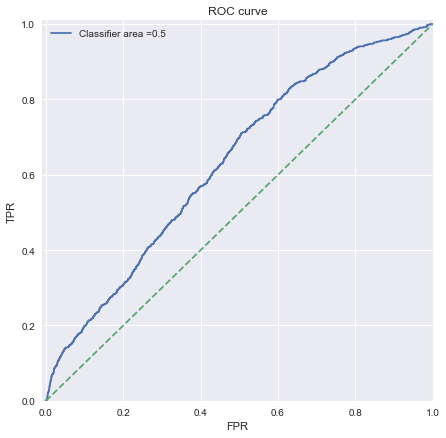

In [48]:
calculate_metrics(y_test,y_hat)
plot_ROC(y_test,X_test,lr)